In [216]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [217]:
df = pd.read_csv("Class11_Stream_Prediction.csv")

print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())

Dataset Shape: (1000, 7)

Missing Values:
 Student_ID                      0
Interest_in_Maths               0
Interest_in_Science             0
Interest_in_SocialScience       0
Hobbies                         0
Extracurricular_Activities    130
Stream_Chosen                   0
dtype: int64


In [218]:
# Treating missing values in Extracurricular activities
df["Extracurricular_Activities"] = df["Extracurricular_Activities"].fillna("Unknown")
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Student_ID                    0
Interest_in_Maths             0
Interest_in_Science           0
Interest_in_SocialScience     0
Hobbies                       0
Extracurricular_Activities    0
Stream_Chosen                 0
dtype: int64


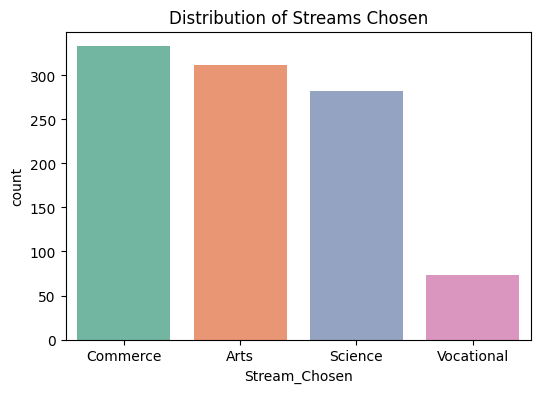

In [219]:
# Distribution of target variable
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
sns.countplot(x="Stream_Chosen", hue="Stream_Chosen", data=df, palette="Set2", legend=False)
plt.title("Distribution of Streams Chosen")
plt.show()

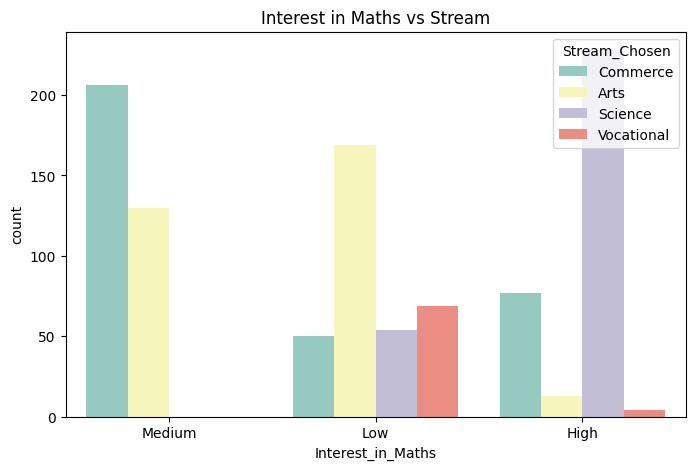

In [220]:
# Interest in subjects vs stream
plt.figure(figsize=(8,5))
sns.countplot(x="Interest_in_Maths", hue="Stream_Chosen", data=df, palette="Set3")
plt.title("Interest in Maths vs Stream")
plt.show()

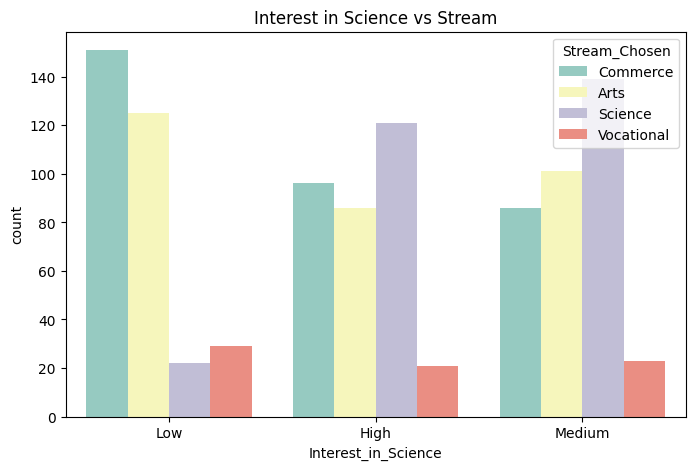

In [221]:
plt.figure(figsize=(8,5))
sns.countplot(x="Interest_in_Science", hue="Stream_Chosen", data=df, palette="Set3")
plt.title("Interest in Science vs Stream")
plt.show()

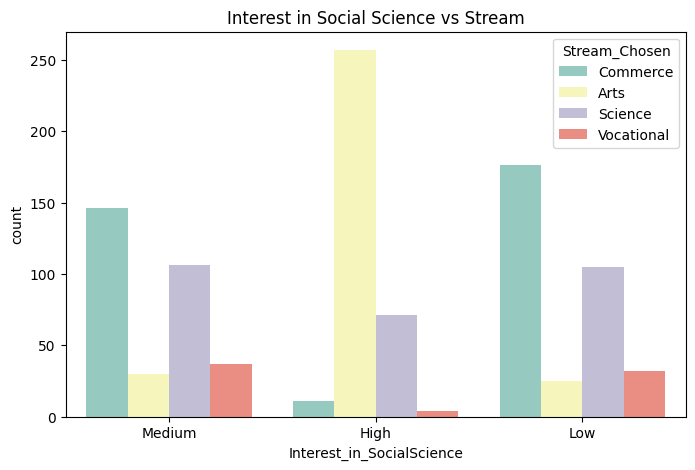

In [222]:
plt.figure(figsize=(8,5))
sns.countplot(x="Interest_in_SocialScience", hue="Stream_Chosen", data=df, palette="Set3")
plt.title("Interest in Social Science vs Stream")
plt.show()

In [223]:
# Features (drop target and ID) and target
X = df.drop(columns=["Stream_Chosen", "Student_ID"])
y = df["Stream_Chosen"]

In [224]:
# One-hot encode categorical features
X_encoded = pd.get_dummies(X)

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [225]:

from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(score_func=chi2, k=20)
X_selected = selector.fit_transform(X_encoded, y_encoded)

selected_features = X_encoded.columns[selector.get_support()]
print(f"Selected features:", selected_features.tolist())

Selected features: ['Interest_in_Maths_High', 'Interest_in_Maths_Low', 'Interest_in_Maths_Medium', 'Interest_in_Science_High', 'Interest_in_Science_Low', 'Interest_in_Science_Medium', 'Interest_in_SocialScience_High', 'Interest_in_SocialScience_Low', 'Interest_in_SocialScience_Medium', 'Hobbies_Coding', 'Hobbies_Designing', 'Hobbies_Painting', 'Hobbies_Reading', 'Hobbies_Writing', 'Extracurricular_Activities_Athletics', 'Extracurricular_Activities_Drama', 'Extracurricular_Activities_Music', 'Extracurricular_Activities_Science Quiz', 'Extracurricular_Activities_Sports', 'Extracurricular_Activities_Unknown']


In [226]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

# Use features already selected 
X_final = X_selected  

log_reg = LogisticRegression(max_iter=1000, random_state=42)
scores = cross_val_score(log_reg, X_final, y_encoded, cv=5, scoring="accuracy")

print("Cross-validation scores:", scores)
print("Mean accuracy:", np.mean(scores))

Cross-validation scores: [0.815 0.795 0.815 0.81  0.81 ]
Mean accuracy: 0.8089999999999999


In [227]:
# Training Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


dt = DecisionTreeClassifier(criterion="entropy", max_depth=None, random_state=42)
dt.fit(X_train, y_train)


y_pred = dt.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", acc)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

scores = cross_val_score(dt, X_encoded, y_encoded, cv=5, scoring="accuracy")
print("\nCross-validation Scores:", scores)
print("Mean CV Accuracy:", np.mean(scores))


Decision Tree Accuracy: 0.8

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82        62
           1       0.82      0.88      0.85        67
           2       0.89      0.86      0.87        56
           3       0.21      0.20      0.21        15

    accuracy                           0.80       200
   macro avg       0.69      0.69      0.69       200
weighted avg       0.80      0.80      0.80       200


Confusion Matrix:
 [[50  7  1  4]
 [ 2 59  2  4]
 [ 2  3 48  3]
 [ 6  3  3  3]]

Cross-validation Scores: [0.785 0.77  0.765 0.85  0.82 ]
Mean CV Accuracy: 0.798


Random Forest Accuracy: 0.785

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82        62
           1       0.90      0.85      0.88        67
           2       0.86      0.88      0.87        56
           3       0.05      0.07      0.06        15

    accuracy                           0.79       200
   macro avg       0.66      0.65      0.66       200
weighted avg       0.81      0.79      0.79       200


Confusion Matrix:
 [[50  3  1  8]
 [ 2 57  1  7]
 [ 2  1 49  4]
 [ 6  2  6  1]]

Cross-validation Scores: [0.8   0.765 0.785 0.855 0.805]
Mean CV Accuracy: 0.8019999999999999


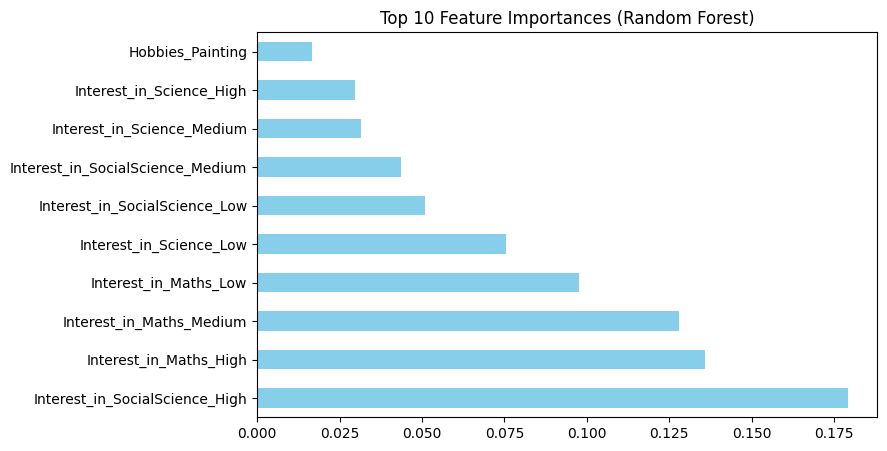

In [228]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


rf = RandomForestClassifier(
    n_estimators=100,        # number of trees
    criterion="entropy",     # or "gini"
    max_depth=None,          # let trees expand fully
    random_state=42
)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", acc)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

scores = cross_val_score(rf, X_encoded, y_encoded, cv=5, scoring="accuracy")
print("\nCross-validation Scores:", scores)
print("Mean CV Accuracy:", np.mean(scores))

# feature Importance
import pandas as pd
import matplotlib.pyplot as plt

feature_importances = pd.Series(rf.feature_importances_, index=X_encoded.columns)
top_features = feature_importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
top_features.plot(kind="barh", color="skyblue")
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()


In [229]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Base model
xgb = XGBClassifier(eval_metric="mlogloss", random_state=42)

# Hyperparameter search space
param_dist = {
    "n_estimators": [100, 200, 300, 400],      
    "max_depth": [3, 4, 5, 6, 8],              
    "learning_rate": [0.01, 0.05, 0.1, 0.2],   
    "subsample": [0.6, 0.8, 1.0],              
    "colsample_bytree": [0.6, 0.8, 1.0],       
    "gamma": [0, 0.1, 0.2, 0.5],               
}

# Randomized search with cross-validation
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,            
    scoring="accuracy",
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best CV Accuracy:", random_search.best_score_)

best_xgb = random_search.best_estimator_
y_pred = best_xgb.predict(X_test)

print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'subsample': 0.6, 'n_estimators': 400, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 0.5, 'colsample_bytree': 1.0}
Best CV Accuracy: 0.8275

Test Accuracy: 0.795

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.81        62
           1       0.88      0.87      0.87        67
           2       0.89      0.86      0.87        56
           3       0.16      0.20      0.18        15

    accuracy                           0.80       200
   macro avg       0.69      0.68      0.68       200
weighted avg       0.81      0.80      0.80       200



In [230]:

from sklearn.linear_model import LogisticRegression
import joblib

# Run feature selection on the original encoded data
X_selected = selector.fit_transform(X_encoded, y_encoded)
selected_features = X_encoded.columns[selector.get_support()]

# Train final logistic regression
log_reg_final = LogisticRegression(max_iter=1000, random_state=42)
log_reg_final.fit(X_selected, y_encoded)

# Save trained model + label encoder + selected features
joblib.dump(log_reg_final, "log_reg_model.pkl")
joblib.dump(le, "label_encoder.pkl")
joblib.dump(selected_features, "selected_features.pkl")

print("✅ Final model trained on ALL data and saved.")



✅ Final model trained on ALL data and saved.


In [231]:
log_reg_model = joblib.load("log_reg_model.pkl")
label_encoder = joblib.load("label_encoder.pkl")
selected_features = joblib.load("selected_features.pkl")


In [ ]:
def FunctionPredictStream(InputData):
    """
    Function to predict student stream from new input(s).
    InputData: pandas DataFrame with the same columns used during training 
               (Interest_in_Maths, Interest_in_Science, Interest_in_SocialScience, Hobbies, Extracurricular_Activities)
    Returns: DataFrame with predictions
    """
    import pandas as pd
    import joblib

    # Number of input rows
    Num_Inputs = InputData.shape[0]

    log_reg_model = joblib.load("log_reg_model.pkl")
    label_encoder = joblib.load("label_encoder.pkl")
    selected_features = joblib.load("selected_features.pkl")

    df_encoded = pd.get_dummies(InputData)

    df_encoded = df_encoded.reindex(columns=selected_features, fill_value=0)

    predictions = log_reg_model.predict(df_encoded)

    predictions_decoded = label_encoder.inverse_transform(predictions)
    PredictionResult = pd.DataFrame(predictions_decoded, columns=["Predicted_Stream"])

    return PredictionResult


In [233]:
# Sample new student records
NewSampleData = pd.DataFrame([
    ["High", "High", "Medium", "Reading", "Sports"],
    ["Low", "Medium", "High", "Music", "Debating"],
    ["Medium", "Low", "Low", "Drawing", "None"],
    ["High", "High", "High", "Coding", "Robotics"],
    ["Low", "Low", "High", "Dancing", "Drama"]
], columns=[
    "Interest_in_Maths",
    "Interest_in_Science",
    "Interest_in_SocialScience",
    "Hobbies",
    "Extracurricular_Activities"
])

print(NewSampleData)


  Interest_in_Maths Interest_in_Science Interest_in_SocialScience  Hobbies  \
0              High                High                    Medium  Reading   
1               Low              Medium                      High    Music   
2            Medium                 Low                       Low  Drawing   
3              High                High                      High   Coding   
4               Low                 Low                      High  Dancing   

  Extracurricular_Activities  
0                     Sports  
1                   Debating  
2                       None  
3                   Robotics  
4                      Drama  


In [234]:
import warnings
warnings.filterwarnings("ignore")
PredictionResult = FunctionPredictStream(InputData=NewSampleData)
print(PredictionResult)

  Predicted_Stream
0          Science
1             Arts
2         Commerce
3          Science
4             Arts


In [235]:
# Function for prediction api
# Creating the function which can take inputs and return predictions
def FunctionGenerateStreamPrediction(Interest_in_Maths, Interest_in_Science, Interest_in_SocialScience,
                                     Hobbies, Extracurricular_Activities):
    import pandas as pd

    # Create DataFrame for model input
    SampleInputData = pd.DataFrame(
        data=[[Interest_in_Maths, Interest_in_Science, Interest_in_SocialScience, Hobbies, Extracurricular_Activities]],
        columns=['Interest_in_Maths', 'Interest_in_Science', 'Interest_in_SocialScience', 'Hobbies', 'Extracurricular_Activities']
    )

    # One-hot encode like during training
    df_encoded = pd.get_dummies(SampleInputData)
    df_encoded = df_encoded.reindex(columns=selected_features, fill_value=0)

    # Make prediction
    prediction = log_reg_model.predict(df_encoded)[0]
    stream = label_encoder.inverse_transform([prediction])[0]

    # Return result as JSON-like dict (same style as API)
    return {"predicted_stream": stream}


# ✅ Example function call
result = FunctionGenerateStreamPrediction(
    Interest_in_Maths="High",
    Interest_in_Science="Medium",
    Interest_in_SocialScience="Low",
    Hobbies="Reading",
    Extracurricular_Activities="Sports"
)

print(result)


{'predicted_stream': 'Science'}
